In [1]:
import pandas as pd

data = pd.read_csv("housing.csv")

In [2]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

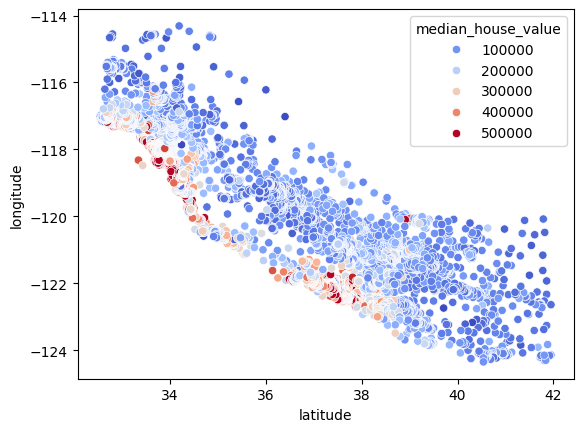

In [ ]:
import seaborn as sb

sb.scatterplot(x="latitude", 
               y="longitude", 
               data=data, 
               hue="median_house_value", 
               palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

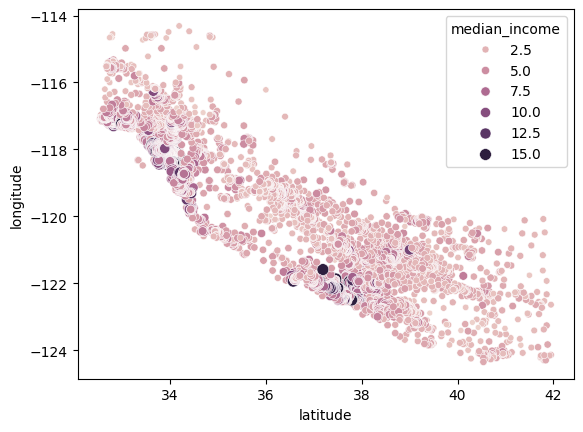

In [7]:
sb.scatterplot(x="latitude", 
               y="longitude", 
               data=data, 
               hue="median_income", 
               size=data["median_income"])

In [8]:
data.loc[:, ["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [15]:
from sklearn.cluster import KMeans

x = data.loc[:, ["latitude", "longitude", "median_income"]]
model = KMeans(n_clusters=6)
predictions = model.fit_predict(x)

In [10]:
predictions.shape

(20640,)

In [16]:
x["economic_segment"] = predictions
x

,latitude,longitude,median_income,economic_segment
0,37.88,-122.23,8.3252,4
1,37.86,-122.22,8.3014,4
2,37.85,-122.24,7.2574,4
3,37.85,-122.25,5.6431,4
4,37.85,-122.25,3.8462,3
...,...,...,...,...
20635,39.48,-121.09,1.5603,3
20636,39.49,-121.21,2.5568,3
20637,39.43,-121.22,1.7000,3
20638,39.43,-121.32,1.8672,3


In [17]:
x["economic_segment"].value_counts()

economic_segment
0    7011
3    4849
2    3840
4    2798
5    1683
1     459
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

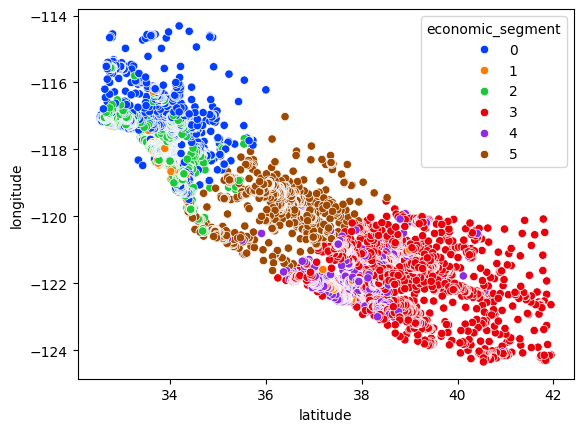

In [20]:
sb.scatterplot(x="latitude", 
               y="longitude", 
               data=x, 
               hue="economic_segment", 
               palette="bright")

<Axes: xlabel='economic_segment', ylabel='count'>

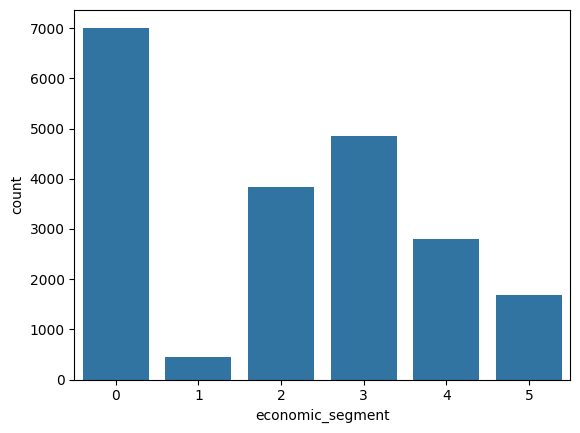

In [26]:
sb.countplot(x="economic_segment", data=x)

In [27]:
x.groupby(["economic_segment"])["median_income"].mean()

economic_segment
0     2.873155
1    10.946702
2     5.516542
3     2.814560
4     5.503269
5     2.669611
Name: median_income, dtype: float64